In [1]:
#In the Loan data set, I tried to create a model to predict the chance of someone getting a loan. The majority of the code is cleaning and imputing data.
#Importing libraries
import pandas as pd #reading csv files
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline

#Reading the Loans dataset
df = pd.read_csv("/users/David Pei/Downloads/train_u6lujuX_CVtuZ9i.csv", index_col = "Loan_ID")

In [2]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
#Changing datatypes from int to float and from object to categorical will save computing memory. 
#But this is not an issue now, just good practice for bigger dfs

In [4]:
#Let's look at the columns in df
df.head(10) 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [5]:
#Get a general sense of the dataframe - numerical columns only.
#Makes sense that Loan Amount and Income are positively correlated
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


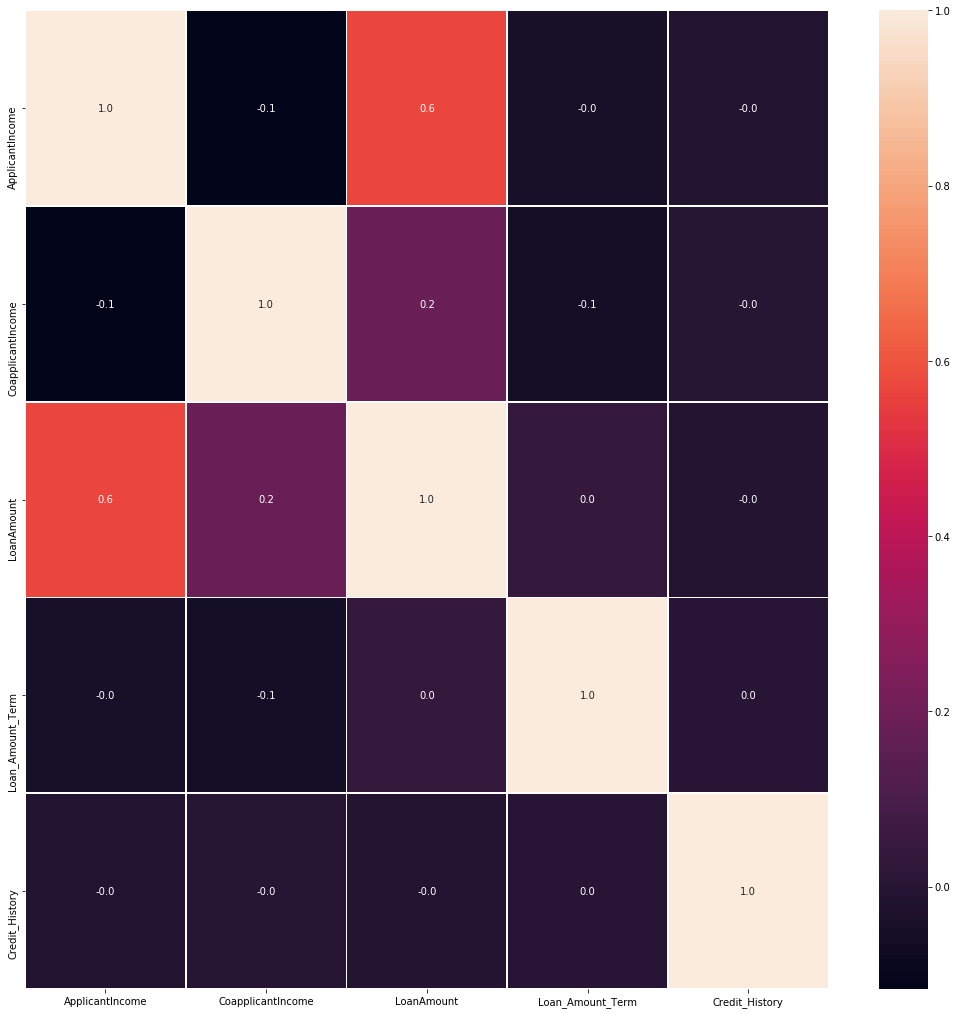

In [6]:
#correlation map to show us how the columns correlate with each other. Althought you can just use df.corr, I think this heat map is kind of cool
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


In [7]:
def missingvals(x):
    return sum(x.isnull())

In [8]:
print ("Missing values per column")
print (df.apply(missingvals))
print (df.apply(missingvals, axis = 1).head())

Missing values per column
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [9]:
#Let's take a took at the categorical values
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
df['Loan_Status'].value_counts()
#Looks like there are no missing values here since total is 614

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
df['Education'].value_counts()
#Looks like there are no missing values here since total is 614. Also you can tell from the missing values table above

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
print ('Chances of getting a Loan based on Credit History')
Loan_Chance = df.pivot_table('Loan_Status', index = ['Credit_History'], aggfunc = lambda x:x.map ({'Y':1, 'N':0}).mean())
Loan_Chance
#You can also make this pivot table in Excel
#It looks like if you do not have credit history, your chances of getting a loan are just belpw 8%. 
#If you do have credit history, your chances of getting a loan are just below 80%.
#How about the missing values?

Chances of getting a Loan based on Credit History


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5,1,'Probability of getting loan based on credit history')

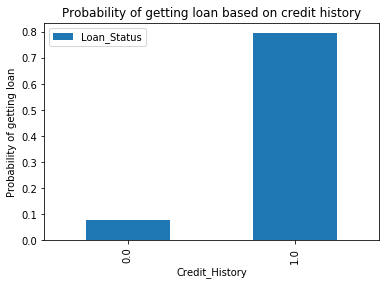

In [13]:
#fig = plt.figure(figsize=(6,4))
#ax1 = fig.add_subplot(121)
ax1 = Loan_Chance.plot(kind = 'bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan based on credit history")

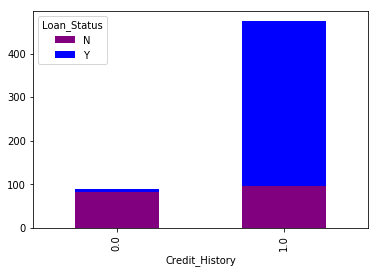

In [14]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [15]:
print ('Chances of getting a Loan based on Education')
Loan_Chance_Education = df.pivot_table('Loan_Status', index = ['Education'], aggfunc = lambda x:x.map ({'Y':1, 'N':0}).mean())
Loan_Chance_Education
#It looks like if you do not graduate college, your chances of getting a loan are about 70%. 
#If you do have credit history, your chances of getting a loan are about 61%.
#How about the missing values?

Chances of getting a Loan based on Education


,Loan_Status
Education,
Graduate,0.708333
Not Graduate,0.611940


Text(0.5,1,'Probability of getting loan based on Education')

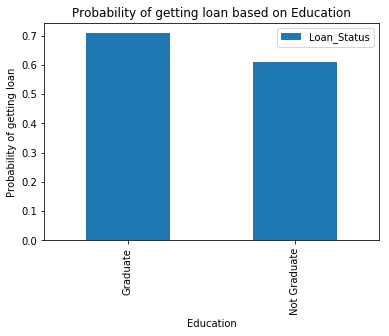

In [16]:
ax1 = Loan_Chance_Education.plot(kind = 'bar')
ax1.set_xlabel('Education')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan based on Education")

In [17]:
df.loc[(df["Gender"] == "Female")&(df["Education"] == "Not Graduate")&(df["Loan_Status"] == "Y"), ["Gender", "Education", "Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [18]:
def missingvals(x):
    return sum(x.isnull())

In [19]:
print ("Missing values per column")
print (df.apply(missingvals))
print (df.apply(missingvals, axis = 1).head())

Missing values per column
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [20]:
#What percentage of LoanAmount data is missing?
len(df['LoanAmount'])
#So 592/614 have values - 96% You are missing 4%.

614

In [21]:
#We can just replace the 22 missing values with the mean of the LoanAmount so we do not skew the data too much
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [22]:
print (df.apply(missingvals))
#Now LoanAmount has no missing values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [23]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
582/614
#About 95% of data from the class Self_Employed is available. It is safe to put 'No' for the remaining 6% because 85% of the entires were 'No'

0.9478827361563518

In [25]:
 df['Self_Employed'].fillna('No',inplace=True)
#inplace=True so I don't get a long list returned

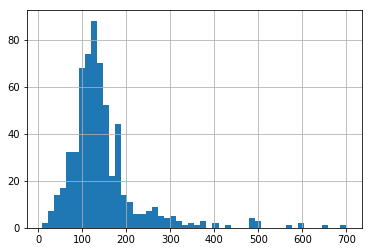

In [26]:
df['LoanAmount'].hist(bins=50) 


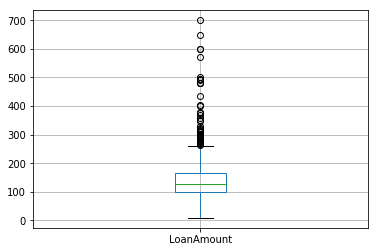

In [27]:
df.boxplot(column = 'LoanAmount')
#There are outliers that must be accounted for. You can tell because there are many values after the last max whisker.

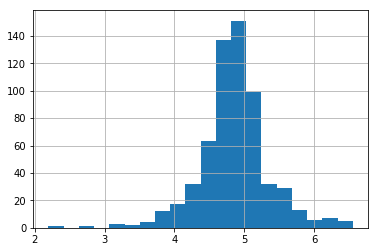

In [28]:
 df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
#This gets rid of outliers in LoanAmount. The outliers may be due to people just asking for bigger loans.

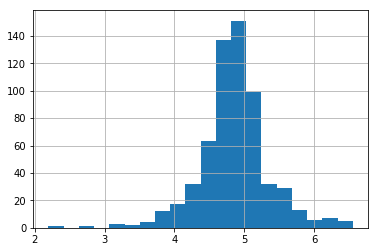

In [29]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 
#This gets rid of outliers in ApplicantIncome 

In [30]:
#Now let's fill in the missing values for Gender
len(df[df.Gender == 'Female']) + len(df[df.Gender == 'Male']) 
#There are 13 missing values for Gender. Also, we saw this before in the missingvals output.

601

In [31]:
df['Gender'].value_counts()
#Around 78% of Applicants are male

Male      489
Female    112
Name: Gender, dtype: int64

In [32]:
 df['Gender'].fillna('Male', limit = 10, inplace=True)
#Replace missing Gender values with male........although it would be good to just replace 10 of them and not all 13 of them

In [33]:
 df['Gender'].fillna('Female', limit = 3, inplace=True)


In [34]:
print (df.apply(missingvals))
#Now Gender class has no more missing values

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64


In [35]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [36]:
df['Married'].fillna('Yes', limit = 2, inplace=True)

In [37]:
df['Married'].fillna('No', limit = 1, inplace=True)

In [38]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [39]:
489/(112+489)

0.8136439267886856

In [40]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [41]:
df['Credit_History'].fillna(1.0, limit = 42, inplace=True)

In [42]:
df['Credit_History'].fillna(0.0, limit = 8, inplace=True)

In [43]:
print (df.apply(missingvals))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64


In [44]:
#WHy not do all this first and then do the graphs like i did above?

In [45]:
len(df[df.Loan_Amount_Term == 360])

512

In [46]:
#We can just replace the 14 missing values with the mean of the Loan_Amount_Term so we do not skew the data too much
df['Loan_Amount_Term'].fillna(value = 360, inplace=True)
#Wait, maybe just fill it in with 360 since that is most of them

In [47]:
len(df[df.Loan_Amount_Term == 360])
#it actually should say 526, just need to restart the kernel

526

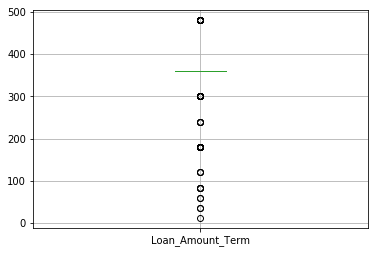

In [48]:
df.boxplot(column = 'Loan_Amount_Term')
#It looks like there are outliers

In [49]:
print (df.apply(missingvals))
#Now Gender class has no more missing values

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64


In [50]:
df['Dependents'].fillna(value = 0, limit=9, inplace=True)

In [51]:
df['Dependents'].fillna(value = 1, limit=3, inplace=True)

In [52]:
df['Dependents'].fillna(value = 2, limit=3, inplace=True)

In [53]:
print (df.apply(missingvals))
#Now there are no missing values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64


In [54]:
df['LoanAmount/TotalIncome'] =(df.LoanAmount+df.TotalIncome)/2
#Make this new column to possibly predict who can pay their loans back

In [55]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,LoanAmount/TotalIncome
Loan_ID,,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,2997.706081
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,3109.500000
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,1533.000000
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2530.500000
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,3070.500000


In [56]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\David Pei\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
#Making classification model:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
    model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
  #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [69]:
#Making a model with credit history using logistic regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.619%
Cross-Validation Score : 80.618%


In [71]:
#I added a few more variables to try and get something more accurate but this seems a bit suspicious. 
#Is this overfitting?
model = DecisionTreeClassifier()
predictor_var = ['Credit_History', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 68.242%


In [78]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Credit_History','TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 97.883%
Cross-Validation Score : 71.499%


In [77]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 98.697%
Cross-Validation Score : 67.756%
